<a href="https://colab.research.google.com/github/alecd1014/Alec_INFO5731_Spring2025/blob/main/Duray_Alec_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here
import pandas as pd

#part 1
#convert csv file into a dataframe
df = pd.read_csv('narrators (2).csv')

#create a function to find all the n-grams
def find_ngrams(text, x):
  #convert all the text into a string and split it into separate words
  word = str(text).split()
  ngram = []
  for i in range(len(word) - x + 1):
    #find each n-gram, convert it to a tuple, and add it to the created list
    ngram.append(tuple(word[i:i + x]))
  return ngram

#create another function to count the n-grams which were found
def count_ngrams(df, x):
  #create a dictionary to store each n-gram and how many times it appears
  ngram_dict = {}
  #go through each row of the dataframe column with the clean data to find each n-gram
  for _, row in df.iterrows():
    data = row['Clean data']
    ngram = find_ngrams(data, x)
    #count how many times each n-gram appears
    for i in ngram:
      if i in ngram_dict:
        ngram_dict[i] += 1
      else:
        ngram_dict[i] = 1
  return ngram_dict

#now count the frequency of each trigram (n=3)
trigram = count_ngrams(df, 3)
#convert into a dataframe with trigram and frequency as the columns
trigram_df = pd.DataFrame(list(trigram.items()), columns=['Trigram', 'Frequency'])
#sort the frequency column by descending order
trigram_df = trigram_df.sort_values(by='Frequency', ascending=False)
#print the dataframe
print(trigram_df)

#next count the frequency of each bigram (n=2)
bigram = count_ngrams(df, 2)
#convert into a dataframe with bigram and frequency as the columns
bigram_df = pd.DataFrame(list(bigram.items()), columns=['Bigram', 'Frequency'])
#sort the frequency column by descending order
bigram_df = bigram_df.sort_values(by='Frequency', ascending=False)
#print the dataframe
print(bigram_df)

                              Trigram  Frequency
14                (nisei, male, born)        382
36                   (world, war, ii)        328
0                (nisei, femal, born)        291
163                (dure, world, war)        269
221                  (war, ii, remov)        163
...                               ...        ...
2984           (salina, follow, bomb)          1
2983           (move, salina, follow)          1
2982           (famili, move, salina)          1
2981              (six, famili, move)          1
7443  (daughter, gordon, hirabayashi)          1

[7444 rows x 2 columns]
                  Bigram  Frequency
16          (male, born)        494
15         (nisei, male)        395
1          (femal, born)        390
36          (world, war)        353
37             (war, ii)        328
...                  ...        ...
2233      (sawtel, area)          1
2234    (juli, honolulu)          1
2236      (commun, aala)          1
2237     (aala, vibrant)   

In [2]:
#part 2

#create a counter to count the frequency of each word
def count_words(df):
  #create dictionary to hold each word and its frequency
  word_dict = {}
  #go through each row in the dataframe
  for _, row in df.iterrows():
    data = row['Clean data']
    #count the frequency of each word in the column
    word = str(data).split()
    for i in word:
      if i in word_dict:
        word_dict[i] += 1
      else:
        word_dict[i] = 1
  return word_dict

#create a function to calculate the probability of each bigram
def bigram_probability(bigram, word_freq):
  #create a dictionary to hold each bigram and its probability
  bigram_prob = {}
  #calculate the probability of each bigram
  for i, j in bigram.items():
    w1, w2 = i
    #bigram probability = count(w1 w2) / count(w1)
    probability = j / word_freq[w2]
    bigram_prob[i] = probability
  return bigram_prob

#count the frequency of each word in the dataframe
word_freq = count_words(df)
#using the word frequency dictionary and the bigram dictionary from
#the previous cell, calculate the probability for each bigram
bigram_prob = bigram_probability(bigram, word_freq)
#convert into a dataframe with bigram and probability as the columns
bigram_prob_df = pd.DataFrame(list(bigram_prob.items()), columns=['Bigram', 'Probability'])
#sort the probabilities in descending order
#bigram_prob_df = bigram_prob_df.sort_values(by='Probability', ascending=False)
#print the dataframe
print(bigram_prob_df)

                      Bigram  Probability
0             (nisei, femal)     0.728155
1              (femal, born)     0.415778
2                (born, may)     0.975000
3             (may, selleck)     0.200000
4      (selleck, washington)     0.009464
...                      ...          ...
5060     (father, herbalist)     1.000000
5061         (herbalist, in)     0.028571
5062             (in, marri)     0.034483
5063  (washington, daughter)     0.166667
5064      (daughter, gordon)     0.333333

[5065 rows x 2 columns]


In [3]:
#part 3
from collections import Counter
#convert the dataframe column into a list
data_list = df['Clean data'].values.tolist()

#create a function to find all the noun phrases for each item in the list
def find_noun_phrases(data):
  #tokenize the text in the list into words
  words = str(data).lower().split()
  #noun phrases usually start with determiners such as 'the' or 'a' or 'an'
  #followed by a noun, or just nouns with no determiner
  #first, we define which words are determiners
  determiners = {'the', 'a', 'an'}
  #create lists for the phrases found
  noun_phrases = []
  new_phrases = []
  #go through each item in the list
  for i in words:
    #check to see if the item is a determiner, and if it is start a new noun phrase
    if i in determiners:
      #if a new noun phrase started add it the new phrase list
      if new_phrases:
        noun_phrases.append(' '.join(new_phrases))
        new_phrases = []
      new_phrases.append(i)
    else:
      #if not treat the word as part of the previous noun phrase
      new_phrases.append(i)
  #finally add the last noun phrase
  if new_phrases:
    noun_phrases.append(' '.join(new_phrases))
  return noun_phrases

#create function to calculate the relative probabilities of each noun phrase
def calc_prob (data_list):
  #retrieve the noun phrases from each item
  item_phrases = []
  #holds all the noun phrases
  all_phrases = []
  for i in data_list:
    noun_phrase = find_noun_phrases(i)
    item_phrases.append(noun_phrase)
    all_phrases.extend(noun_phrase)
  #get the frequency of each noun phrase from the whole dataframe
  phrase_freq = Counter(all_phrases)
  #get the max frequency of a noun phrase
  max_freq = max(phrase_freq.values())
  #create a list to hold the probabilities of each item
  rel_prob = []
  unique_phrases = list(phrase_freq.keys())
  #find the probabilities for each noun phrase for each item
  for i, noun_phrase in enumerate(item_phrases):
    item_prob = {}
    item_freq = Counter(noun_phrase)
    for x in unique_phrases:
      if x in item_freq:
        probability = item_freq[x] / max_freq
      else:
        probability = 0
      item_prob[x] = probability
    rel_prob.append(item_prob)
  return rel_prob, unique_phrases

#use the function to calculate the relative probabilites for the entire dataframe
rel_prob, unique = calc_prob(data_list)
#create a new dataframe to show the probability for each noun phrase
prob_df = pd.DataFrame(rel_prob, columns=unique)
print(prob_df.head())

   nisei femal born may selleck washington spent much childhood beaverton oregon father own farm influenc earli  \
0                                               0.25                                                              
1                                               0.00                                                              
2                                               0.00                                                              
3                                               0.00                                                              
4                                               0.00                                                              

   nisei male born june seattl washington grew area seattl japanes american attend  \
0                                               0.00                                 
1                                               0.25                                 
2                                               0.0

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [4]:
# Write your code here

#part 1
import math

#using the same dataframe, convert into a string
#and tokenize the items in the dataframe column into words
items = df['Clean data'].astype(str).apply(lambda x: x.lower().split())
#get all the unique words across the entire dataframe
all_words = set([word for item in items for word in item])
#start the matrix
matrix = []

#get the frequency of each word for each item
for item in items:
  word_count = {term: item.count(term) for term in all_words}
  matrix.append(word_count)

#find the total number of items
total_items = len(items)
#create a dictionary for the IDF values for the Inverse Document Frequency
idf_values = {}
#find the IDF for each item
for term in all_words:
  item_count = sum(1 for item in items if term in item)
  idf_values[term] = math.log(total_items / (1 + item_count)) #1+item_count avoids division by zero

#create an empty list for tf-idf
tf_idf = []
#find the TF-IDF for each item
for word_count in matrix:
  tf_idf_item = {}
  for term, freq in word_count.items():
    #TF
    tf = freq / len(word_count)
    #TF-IDF = TF * IDF
    tf_idf_item[term] = tf * idf_values[term]
  tf_idf.append(tf_idf_item)

#convert the TF-IDF matrix into a dataframe
tf_idf_df = pd.DataFrame(tf_idf, columns=list(all_words))
print(tf_idf_df.head())

   kikuno  justic  ookala  arkansa  meticul  editor  fife  ran  weyerhaeus  \
0     0.0     0.0     0.0      0.0      0.0     0.0   0.0  0.0         0.0   
1     0.0     0.0     0.0      0.0      0.0     0.0   0.0  0.0         0.0   
2     0.0     0.0     0.0      0.0      0.0     0.0   0.0  0.0         0.0   
3     0.0     0.0     0.0      0.0      0.0     0.0   0.0  0.0         0.0   
4     0.0     0.0     0.0      0.0      0.0     0.0   0.0  0.0         0.0   

   tsutakawa  ...  brother  boyd  shizuto  pacifist  detail  huntington  \
0        0.0  ...      0.0   0.0      0.0       0.0     0.0         0.0   
1        0.0  ...      0.0   0.0      0.0       0.0     0.0         0.0   
2        0.0  ...      0.0   0.0      0.0       0.0     0.0         0.0   
3        0.0  ...      0.0   0.0      0.0       0.0     0.0         0.0   
4        0.0  ...      0.0   0.0      0.0       0.0     0.0         0.0   

   order    sansei  acr  guadalup  
0    0.0  0.000000  0.0       0.0  
1    0.0

In [8]:
#part 2
import numpy as np

#first create a function to find the cosine similarity between two items
def cosine_simil(item1, item2):
  dot_product = np.dot(item1, item2)
  mag_1 = np.linalg.norm(item1)
  mag_2 = np.linalg.norm(item2)
  if mag_1 == 0 or mag_2 == 0:
    return 0
  return dot_product / (mag_1 * mag_2)

#create the query from which the items will be ranked
query = 'The woman was born during World War II.'
#tokenize the query
query_words = query.lower().split()
#find the TF or term frequency for the query
tf_query = {}
total_query = len(query_words)
for i in all_words:
  tf_query[i] = query_words.count(i) / total_query
#find the TF-IDF for the query
tf_idf_query = {i: tf_query[i] * idf_values[i] for i in tf_query}

#next find the cosine similarity between the query and each document
#using the TF-IDF of the query and the TF-IDF of the documents in the above cell
cosine_similarities = []
for i in tf_idf:
  item_vector = np.array([i.get(j, 0) for j in all_words])
  query_vector = np.array([tf_idf_query.get(j, 0) for j in all_words])
  #calc the cosine similarity based on the above vectors
  simil = cosine_simil(item_vector, query_vector)
  cosine_similarities.append(simil)

#Finally add the similarities to a dataframe and rank the items based on
#their cosine similarities
df['Cosine Similarity'] = cosine_similarities
df['rank'] = df['Cosine Similarity'].rank(ascending=False)
df_sorted = df.sort_values(by='rank', ascending=True)
#print the dataframe
print(df_sorted[['Clean data', 'Cosine Similarity', 'rank']])

                                            Clean data  Cosine Similarity  \
424  nisei femal born novemb san francisco californ...           0.300477   
849  nisei femal born rais hawaii after bomb pearl ...           0.227756   
923  white male born februari seattl washington cop...           0.185108   
922  white femal daughter walt milli woodward publi...           0.172055   
385  elain kim led panel interview ruthann paul mik...           0.124606   
..                                                 ...                ...   
39   white male grew pasadena california parent flo...           0.000000   
396  in session ana tanaka led panel kip tokuda fri...           0.000000   
744             sansei femal grew san diego california           0.000000   
282  nisei male grew lo angel california marri remo...           0.000000   
608  elain kim dr kyle kinoshita interview arlen ok...           0.000000   

      rank  
424    1.0  
849    2.0  
923    3.0  
922    4.0  
385    6.0

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [12]:
# Write your code here
#part 1
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

new_df = pd.read_csv('narrators (2).csv')

#first clean and tokenize the text in the dataframe column
#function to tokenize the text
def tokenize_text(text):
  text = str(text).lower()
  token = word_tokenize(text)
  return token
#use the function on the dataframe
tokenized_df = new_df['Clean data'].apply(tokenize_text)

#create the Word2Vec model with 300 dimensions
model = Word2Vec(sentences=tokenized_df, vector_size=300, window=5, min_count=1, workers=4)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


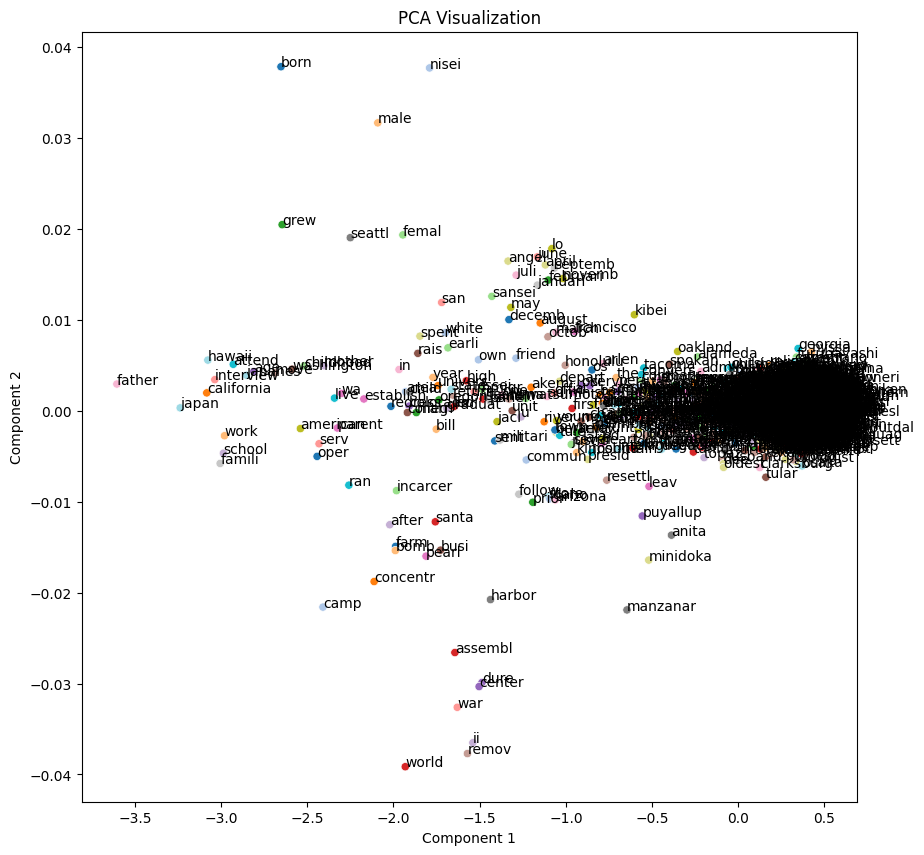

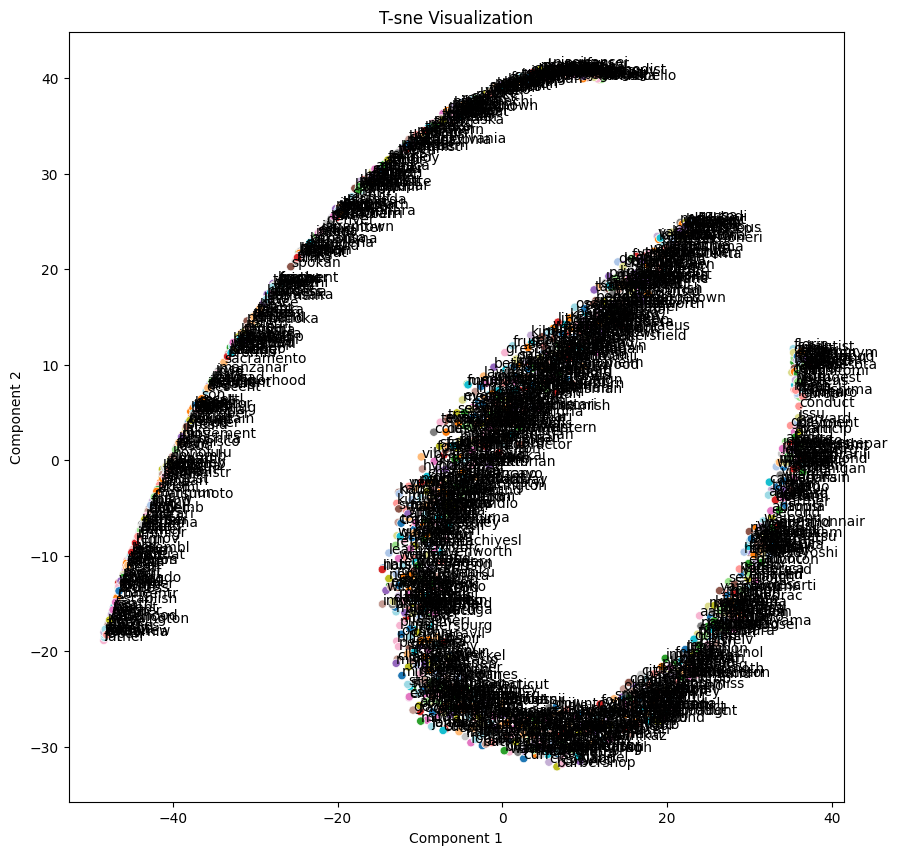

In [15]:
#part 2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
#I used seaborn to make the plots look better

#first get the embeddings for words from the above model
words = list(model.wv.index_to_key)
#get the vectors for the words in the list
word_vectors = np.array([model.wv[i] for i in words])

#create function to visualize the model using both PCA and T-sne
#using if and elif to make it less complicated
def visualize (word_vectors, words, method='pca'):
  if method == 'pca':
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)
    title = 'PCA Visualization'
  elif method == 'tsne':
    tsne = TSNE(n_components=2, random_state=42)
    result = tsne.fit_transform(word_vectors)
    title = 'T-sne Visualization'
  #Create the scatter plot
  plt.figure(figsize=(10, 10))
  sns.scatterplot(x=result[:, 0], y=result[:, 1], hue=words, palette='tab20', legend=None)
  plt.title(title)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  #annotate the words on the plot
  for i, word in enumerate(words):
    plt.annotate(word, (result[i, 0], result[i, 1]))
  plt.show()

#visualize using PCA
visualize(word_vectors, words, method='pca')
#visualize using T-sne
visualize(word_vectors, words, method='tsne')

In [17]:
#part 3
from sklearn.metrics.pairwise import cosine_similarity

#pick several pairs of words to test
word_pairs = [('own', 'friend'), ('kibei', 'oakland'), ('leav', 'anita')]

#create a function to fine the cosine similarity between the above word pairs to test the models
def cosine_sim(model, word_pairs):
  similarities = {}
  for word1, word2 in word_pairs:
    #get the vector for each word in each pair
    vec1 = model.wv[word1]
    vec2 = model.wv[word2]
    #since cosine similarity needs 2D arrays, reshape the vectors
    reshape1 = vec1.reshape(1, -1)
    reshape2 = vec2.reshape(1, -1)
    #calc the similarity
    simil = cosine_similarity(reshape1, reshape2)[0][0]
    similarities[(word1, word2)] = simil
  return similarities

#use the function to calculate the cosine similarity for each word pair
similarities = cosine_sim(model, word_pairs)
#output the results, the closer the number is to 1 the more related the terms are
#since the selected pairs were all close together, the results should be on the higher end
for pair, simil in similarities.items():
  print(f"Similarity between '{pair[0]}' and '{pair[1]}': {simil:.4f}")

Similarity between 'own' and 'friend': 0.9996
Similarity between 'kibei' and 'oakland': 0.9986
Similarity between 'leav' and 'anita': 0.9980


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [21]:
# The GitHub link of your final csv file
clean_df = new_df.drop('Narrator Data', axis=1)
clean_df['Number'] = clean_df.index + 1
cols = list(clean_df.columns)
cols.reverse()
clean_df = clean_df[cols]
clean_df.to_csv('Clean_Narrators.csv')
#the labeling schema I want to use would be in which state each narrator was born
#or if they were born outside of the country
#Maybe I would like to use the Text classification NLP task on the dataset
# Link:
#https://github.com/alecd1014/Alec_INFO5731_Spring2025/blob/main/Clean_Narrators.csv



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer